In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score


In [2]:


labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']

label = 0    # No finding
# label = 10 # Pleural effusion
print(labels[label])


No Finding


#DISEASE CLASSIFIFCATION

In [3]:
def subgroup_fairness_analysis(label, csv_path,data_dir,cnn_pred_disease):
    df = pd.read_csv(csv_path)
    data_dir = data_dir
    cnn_pred_disease = pd.read_csv(data_dir + cnn_pred_disease)
    white = 'White'
    asian = 'Asian'
    black = 'Black'
    cnn_pred_disease['race'] = df['race']
    cnn_pred_disease['sex'] = df['sex']
    cnn_pred_disease['age'] = df['age']
    cnn_pred_disease[labels[label]] = df[labels[label]]
    # subgroups
    cnn_pred_m = cnn_pred_disease[cnn_pred_disease['sex'] == 'Male'].copy()
    cnn_pred_f = cnn_pred_disease[cnn_pred_disease['sex'] == 'Female'].copy()
    cnn_pred_w = cnn_pred_disease[cnn_pred_disease['race'] == white].copy()
    cnn_pred_a = cnn_pred_disease[cnn_pred_disease['race'] == asian].copy()
    cnn_pred_b = cnn_pred_disease[cnn_pred_disease['race'] == black].copy()
    cnn_pred_0_20 = cnn_pred_disease[cnn_pred_disease['age'] <20].copy()
    cnn_pred_20_40 = cnn_pred_disease[(20 <= cnn_pred_disease['age']) & (cnn_pred_disease['age'] < 40)].copy()
    cnn_pred_40_60 = cnn_pred_disease[(40 <= cnn_pred_disease['age']) & (cnn_pred_disease['age'] < 60)].copy()
    cnn_pred_60_80 = cnn_pred_disease[(60 <= cnn_pred_disease['age']) & (cnn_pred_disease['age'] < 80)].copy()
    cnn_pred_80_older = cnn_pred_disease[(80 <= cnn_pred_disease['age'])].copy()

    # Print the number of elements in each subgroup
    print("Number of Male cases:", len(cnn_pred_m))
    print("Number of Female cases:", len(cnn_pred_f))
    print("Number of White cases:", len(cnn_pred_w))
    print("Number of Asian cases:", len(cnn_pred_a))
    print("Number of Black cases:", len(cnn_pred_b))
    print("Number of cases aged 0-20:", len(cnn_pred_0_20))
    print("Number of cases aged 20-40:", len(cnn_pred_20_40))
    print("Number of cases aged 40-60:", len(cnn_pred_40_60))
    print("Number of cases aged 60-80:", len(cnn_pred_60_80))
    print("Number of cases aged 80 and older:", len(cnn_pred_80_older))
    preds = cnn_pred_disease['class_' + str(label)]
    targets = np.array(cnn_pred_disease['target_' + str(label)])

    preds_m = cnn_pred_m['class_' + str(label)]
    targets_m = np.array(cnn_pred_m['target_' + str(label)])

    preds_f = cnn_pred_f['class_' + str(label)]
    targets_f = np.array(cnn_pred_f['target_' + str(label)])

    preds_w = cnn_pred_w['class_' + str(label)]
    targets_w = np.array(cnn_pred_w['target_' + str(label)])

    preds_a = cnn_pred_a['class_' + str(label)]
    targets_a = np.array(cnn_pred_a['target_' + str(label)])

    preds_b = cnn_pred_b['class_' + str(label)]
    targets_b = np.array(cnn_pred_b['target_' + str(label)])

    # preds_0_20 = cnn_pred_0_20['class_' + str(label)]
    # targets_0_20 = np.array(cnn_pred_0_20['target_' + str(label)])

    # preds_20_40 = cnn_pred_20_40['class_' + str(label)]
    # targets_20_40 = np.array(cnn_pred_20_40['target_' + str(label)])

    # preds_40_60 = cnn_pred_40_60['class_' + str(label)]
    # targets_40_60 = np.array(cnn_pred_40_60['target_' + str(label)])

    # preds_60_80 = cnn_pred_60_80['class_' + str(label)]
    # targets_60_80 = np.array(cnn_pred_60_80['target_' + str(label)])

    # preds_80_older= cnn_pred_80_older['class_' + str(label)]
    # targets_80_older = np.array(cnn_pred_80_older['target_' + str(label)])
    
    target_fpr = 0.2

    fpr, tpr, thres = roc_curve(targets, preds)
    fpr_w, tpr_w, thres_w = roc_curve(targets_w, preds_w)
    fpr_a, tpr_a, thres_a = roc_curve(targets_a, preds_a)
    fpr_b, tpr_b, thres_b = roc_curve(targets_b, preds_b)
    fpr_m, tpr_m, thres_m = roc_curve(targets_m, preds_m)
    fpr_f, tpr_f, thres_f = roc_curve(targets_f, preds_f)
    # fpr_0_20, tpr_0_20, thres_0_20 = roc_curve(targets_0_20, preds_0_20)
    # fpr_20_40, tpr_20_40, thres_20_40 = roc_curve(targets_20_40, preds_20_40)
    # fpr_40_60, tpr_40_60, thres_40_60 = roc_curve(targets_40_60, preds_40_60)
    # fpr_60_80, tpr_60_80, thres_60_80 = roc_curve(targets_60_80, preds_60_80)
    # fpr_80_older, tpr_80_older, thres_80_older = roc_curve(targets_80_older, preds_80_older)

    roc_auc = auc(fpr, tpr)
    roc_auc_w = auc(fpr_w, tpr_w)
    roc_auc_a = auc(fpr_a, tpr_a)
    roc_auc_b = auc(fpr_b, tpr_b)
    roc_auc_m = auc(fpr_m, tpr_m)
    roc_auc_f = auc(fpr_f, tpr_f)
    # roc_auc_0_20 = auc(fpr_0_20, tpr_0_20)
    # roc_auc_20_40 = auc(fpr_20_40, tpr_20_40)
    # roc_auc_40_60 = auc(fpr_40_60, tpr_40_60)
    # roc_auc_60_80 = auc(fpr_60_80, tpr_60_80)
    # roc_auc_80_older = auc(fpr_80_older, tpr_80_older)

    # global threshold
    op = thres[np.argmin(np.abs(fpr-target_fpr))]

    print('All \t Threshold %0.4f' % op)

    # APPLYING GLOBAL THRESHOLD
    fpr_t = 1 - recall_score(targets, preds>=op, pos_label=0)
    tpr_t = recall_score(targets, preds>=op, pos_label=1)

    fpr_t_w = 1 - recall_score(targets_w, preds_w>=op, pos_label=0)
    tpr_t_w = recall_score(targets_w, preds_w>=op, pos_label=1)

    fpr_t_a = 1 - recall_score(targets_a, preds_a>=op, pos_label=0)
    tpr_t_a = recall_score(targets_a, preds_a>=op, pos_label=1)

    fpr_t_b = 1 - recall_score(targets_b, preds_b>=op, pos_label=0)
    tpr_t_b = recall_score(targets_b, preds_b>=op, pos_label=1)

    fpr_t_f = 1 - recall_score(targets_f, preds_f>=op, pos_label=0)
    tpr_t_f = recall_score(targets_f, preds_f>=op, pos_label=1)

    fpr_t_m = 1 - recall_score(targets_m, preds_m>=op, pos_label=0)
    tpr_t_m = recall_score(targets_m, preds_m>=op, pos_label=1)

    # fpr_t_0_20 = 1 - recall_score(targets_0_20, preds_0_20>=op, pos_label=0)
    # tpr_t_0_20 = recall_score(targets_0_20, preds_0_20>=op, pos_label=1)

    # fpr_t_20_40 = 1 - recall_score(targets_20_40, preds_20_40>=op, pos_label=0)
    # tpr_t_20_40 = recall_score(targets_20_40, preds_20_40>=op, pos_label=1)

    # fpr_t_40_60 = 1 - recall_score(targets_40_60, preds_40_60>=op, pos_label=0)
    # tpr_t_40_60 = recall_score(targets_40_60, preds_40_60>=op, pos_label=1)

    # fpr_t_60_80 = 1 - recall_score(targets_60_80, preds_60_80>=op, pos_label=0)
    # tpr_t_60_80 = recall_score(targets_60_80, preds_60_80>=op, pos_label=1)

    # fpr_t_80_older = 1 - recall_score(targets_80_older, preds_80_older>=op, pos_label=0)
    # tpr_t_80_older = recall_score(targets_80_older, preds_80_older>=op, pos_label=1)



    print('All\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t,fpr_t,roc_auc))
    print('White\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_w,fpr_t_w,roc_auc_w))
    print('Asian\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_a,fpr_t_a,roc_auc_a))
    print('Black\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_b,fpr_t_b,roc_auc_b))
    print('Female\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_f,fpr_t_f,roc_auc_f))
    print('Male\tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_m,fpr_t_m,roc_auc_m))
    # print('0-20 y/o \tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_0_20,fpr_t_0_20,roc_auc_0_20))
    # print('20-40 y/o \tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_20_40,fpr_t_20_40,roc_auc_20_40))
    # print('40-60 y/o \tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_40_60,fpr_t_40_60,roc_auc_40_60))
    # print('60-80 y/o \tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_60_80,fpr_t_60_80,roc_auc_60_80))
    # print('80 or more y/o \tTPR %0.2f | FPR %0.2f | AUC %0.2f' % (tpr_t_80_older,fpr_t_80_older,roc_auc_80_older))

    # Calculate Average Precision
    ap = average_precision_score(targets, preds)
    ap_w = average_precision_score(targets_w, preds_w)
    ap_a = average_precision_score(targets_a, preds_a)
    ap_b = average_precision_score(targets_b, preds_b)
    ap_f = average_precision_score(targets_f, preds_f)
    ap_m = average_precision_score(targets_m, preds_m)
    # ap_0_20 = average_precision_score(targets_0_20, preds_0_20)
    # ap_20_40 = average_precision_score(targets_20_40, preds_20_40)
    # ap_40_60 = average_precision_score(targets_40_60, preds_40_60)
    # ap_60_80 = average_precision_score(targets_60_80, preds_60_80)
    # ap_80_older = average_precision_score(targets_80_older, preds_80_older)

    ap_values = {
        'All': ap,
        'White': ap_w,
        'Asian': ap_a,
        'Black': ap_b,
        'Female': ap_f,
        'Male': ap_m,
        # '0-20 y/o': ap_0_20,
        # '20-40 y/o': ap_20_40,
        # '40-60 y/o': ap_40_60,
        # '60-80 y/o': ap_60_80,
        # '80 or more y/o': ap_80_older,
    }

    # Print AP values
    print('All\tAP %0.2f' % ap)
    print('White\tAP %0.2f' % ap_w)
    print('Asian\tAP %0.2f' % ap_a)
    print('Black\tAP %0.2f' % ap_b)
    print('Female\tAP %0.2f' % ap_f)
    print('Male\tAP %0.2f' % ap_m)
    # print('0-20 y/o \tAP %0.2f' % ap_0_20)
    # print('20-40 y/o \tAP %0.2f' % ap_20_40)
    # print('40-60 y/o \tAP %0.2f' % ap_40_60)
    # print('60-80 y/o \tAP %0.2f' % ap_60_80)
    # print('80 or more y/o \tAP %0.2f' % ap_80_older)


    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(targets, preds)
    precision_w, recall_w, _ = precision_recall_curve(targets_w, preds_w)
    precision_a, recall_a, _ = precision_recall_curve(targets_a, preds_a)
    precision_b, recall_b, _ = precision_recall_curve(targets_b, preds_b)
    precision_f, recall_f, _ = precision_recall_curve(targets_f, preds_f)
    precision_m, recall_m, _ = precision_recall_curve(targets_m, preds_m)
    # precision_0_20, recall_0_20, _ = precision_recall_curve(targets_0_20, preds_0_20)
    # precision_20_40, recall_20_40, _ = precision_recall_curve(targets_20_40, preds_20_40)
    # precision_40_60, recall_40_60, _ = precision_recall_curve(targets_40_60, preds_40_60)
    # precision_60_80, recall_60_80, _ = precision_recall_curve(targets_60_80, preds_60_80)
    # precision_80_older, recall_80_older, _ = precision_recall_curve(targets_80_older, preds_80_older)

    fig, axes = plt.subplots(1, 3, figsize=(24, 7))

    # Plot ROC curves
    axes[0].plot(fpr, tpr, lw=1.5, alpha=.8, label='All AUC=%0.2f' % roc_auc_w)
    axes[0].plot(fpr_w, tpr_w, lw=1.5, alpha=.8, label='White AUC=%0.2f' % roc_auc_w)
    axes[0].plot(fpr_a, tpr_a, lw=1.5, alpha=.8, label='Asian AUC=%0.2f' % roc_auc_a)
    axes[0].plot(fpr_b, tpr_b, lw=1.5, alpha=.8, label='Black AUC=%0.2f' % roc_auc_b)
    axes[0].plot(fpr_f, tpr_f, lw=1.5, alpha=.8, label='Female AUC=%0.2f' % roc_auc_f)
    axes[0].plot(fpr_m, tpr_m, lw=1.5, alpha=.8, label='Male AUC=%0.2f' % roc_auc_m)
    axes[0].set_prop_cycle(None) 
    axes[0].plot(fpr_t_w, tpr_t_w, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_w,fpr_t_w))
    axes[0].plot(fpr_t_a, tpr_t_a, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_a,fpr_t_a))
    axes[0].plot(fpr_t_b, tpr_t_b, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_b,fpr_t_b))
    axes[0].plot(fpr_t_f, tpr_t_f, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_f,fpr_t_f))
    axes[0].plot(fpr_t_m, tpr_t_m, 'X', alpha=.8, markersize=10, label='TPR=%0.2f FPR=%0.2f' % (tpr_t_m,fpr_t_m))
    axes[0].plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
    axes[0].set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
    axes[0].set_xlabel('False Positive Rate', fontsize=14)
    axes[0].set_ylabel('True Positive Rate', fontsize=14)
    axes[0].set_title(labels[label] + ' - ROC Curve', fontsize=14)
    axes[0].legend(loc="lower right", fontsize=8, ncol=2)

    # Plot Precision-Recall curves
    axes[1].plot(recall, precision, lw=1.5, label='All')
    axes[1].plot(recall_w, precision_w, lw=1.5, label='White')
    axes[1].plot(recall_a, precision_a, lw=1.5, label='Asian')
    axes[1].plot(recall_b, precision_b, lw=1.5, label='Black')
    axes[1].plot(recall_f, precision_f, lw=1.5, label='Female')
    axes[1].plot(recall_m, precision_m, lw=1.5, label='Male')
    axes[1].set_xlabel('Recall', fontsize=14)
    axes[1].set_ylabel('Precision', fontsize=14)
    axes[1].set_title(labels[label] + ' - Precision-Recall Curve', fontsize=14)
    axes[1].legend(loc='lower left', fontsize=8)

    # Plot Average Precision
    bars = axes[2].bar(ap_values.keys(), ap_values.values(), color='blue')
    for bar in bars:
        yval = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black')
    axes[2].set_xlabel('Subgroups')
    axes[2].set_ylabel('Average Precision (AP)')
    axes[2].set_title(labels[label] + ' - Average Precision (AP) for Different Subgroups')
    axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment
    csv_path_text = f"CSV Path: {csv_path}"
    plt.figtext(0.5, 0.01, csv_path_text, ha='center', va='center', fontsize=10, color='gray')

    plt.tight_layout()
    plt.show()



Number of Male cases: 22266
Number of Female cases: 15974
Number of White cases: 29844
Number of Asian cases: 5650
Number of Black cases: 2746
Number of cases aged 0-20: 242
Number of cases aged 20-40: 3654
Number of cases aged 40-60: 10578
Number of cases aged 60-80: 16541
Number of cases aged 80 and older: 7225
All 	 Threshold 0.0579
All	TPR 0.80 | FPR 0.20 | AUC 0.87
White	TPR 0.79 | FPR 0.20 | AUC 0.87
Asian	TPR 0.81 | FPR 0.20 | AUC 0.88
Black	TPR 0.86 | FPR 0.24 | AUC 0.89
Female	TPR 0.79 | FPR 0.21 | AUC 0.87
Male	TPR 0.80 | FPR 0.20 | AUC 0.87
All	AP 0.41
White	AP 0.40
Asian	AP 0.41
Black	AP 0.54
Female	AP 0.42
Male	AP 0.40


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


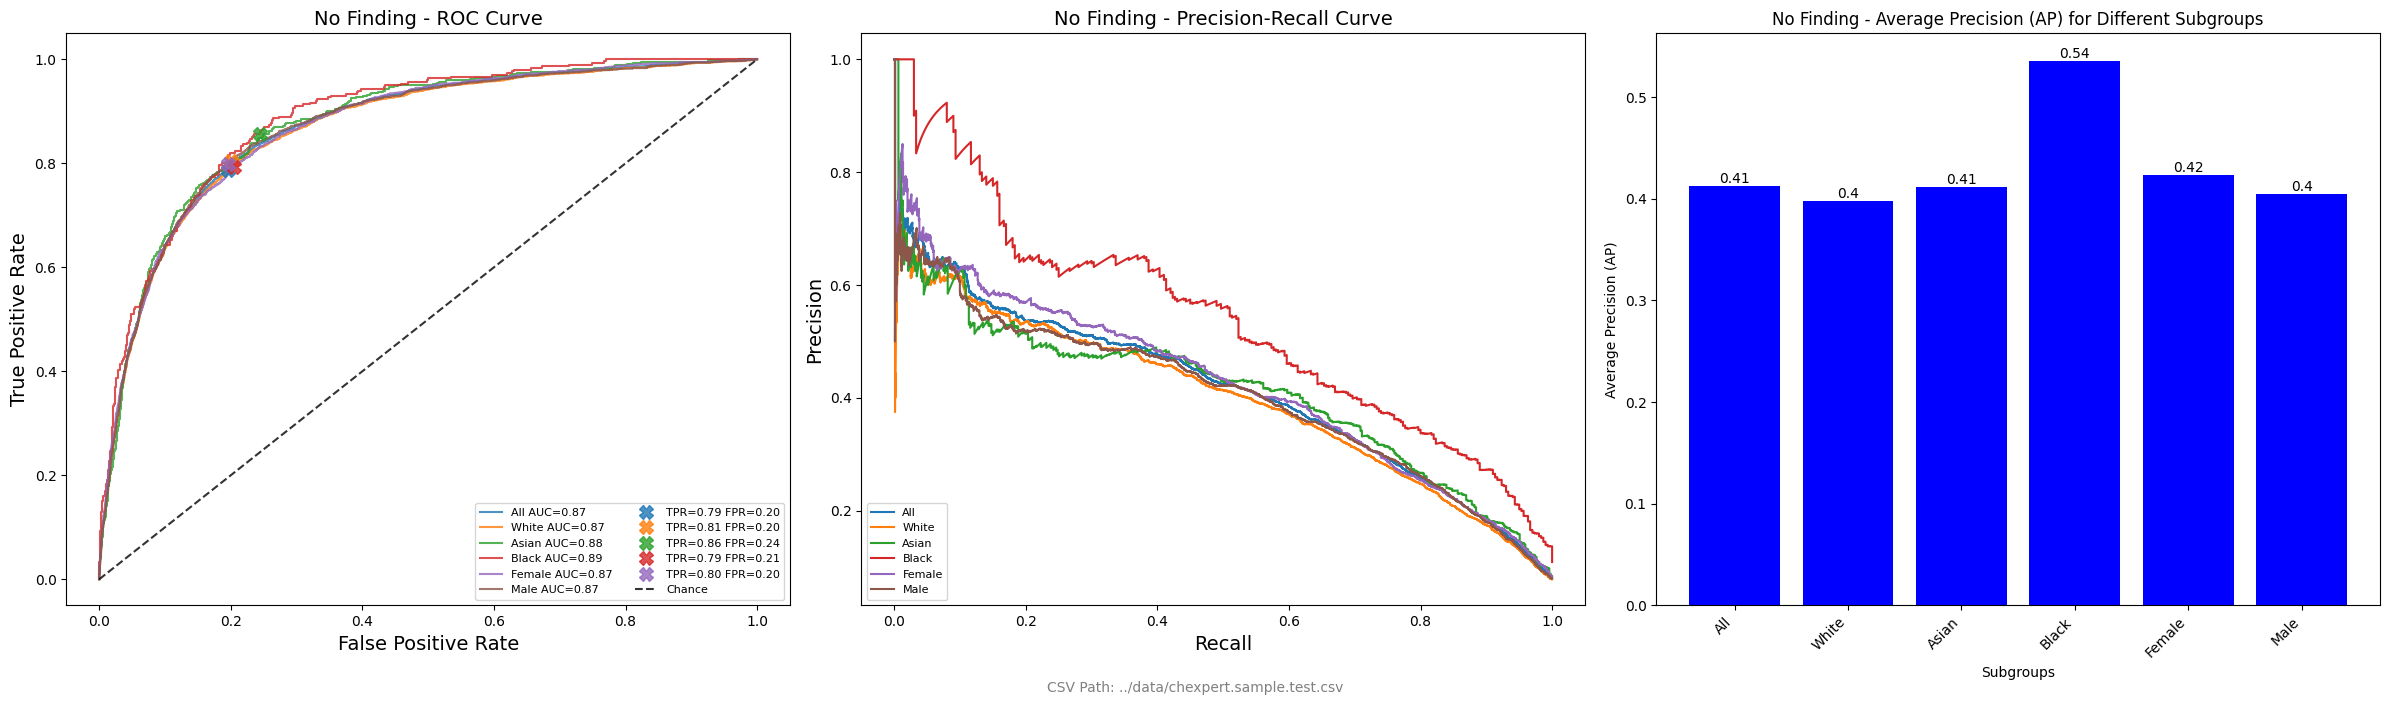

In [4]:
subgroup_fairness_analysis(0,'../data/chexpert.sample.test.csv','../disease/chexpert/disease/resnet-all/', 'predictions.test.csv' )

Number of Male cases: 22266
Number of Female cases: 15974
Number of White cases: 29844
Number of Asian cases: 5650
Number of Black cases: 2746
Number of cases aged 0-20: 242
Number of cases aged 20-40: 3654
Number of cases aged 40-60: 10578
Number of cases aged 60-80: 16541
Number of cases aged 80 and older: 7225
All 	 Threshold 0.6070
All	TPR 0.77 | FPR 0.20 | AUC 0.87
White	TPR 0.77 | FPR 0.20 | AUC 0.87
Asian	TPR 0.80 | FPR 0.21 | AUC 0.88
Black	TPR 0.69 | FPR 0.14 | AUC 0.87
Female	TPR 0.77 | FPR 0.20 | AUC 0.87
Male	TPR 0.77 | FPR 0.20 | AUC 0.87
All	AP 0.82
White	AP 0.82
Asian	AP 0.85
Black	AP 0.77
Female	AP 0.83
Male	AP 0.81


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


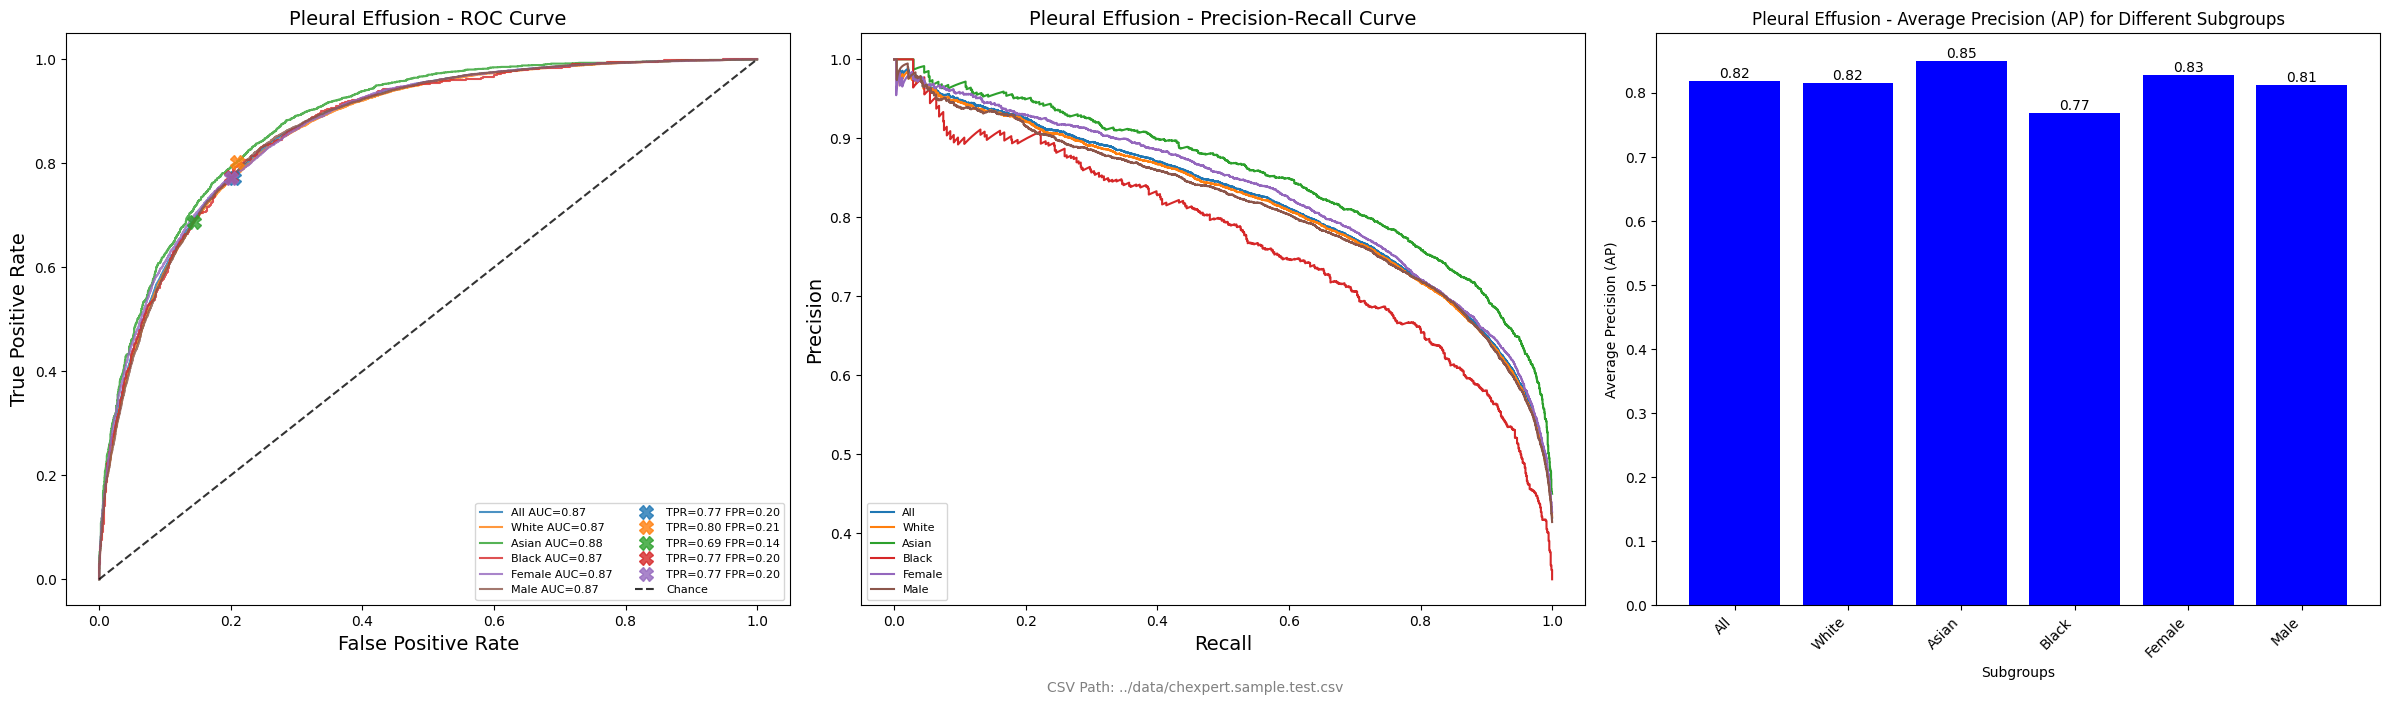

In [5]:
subgroup_fairness_analysis(10,'../data/chexpert.sample.test.csv','../disease/chexpert/disease/resnet-all/', 'predictions.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0590
All	TPR 0.80 | FPR 0.20 | AUC 0.87
White	TPR 0.79 | FPR 0.19 | AUC 0.87
Asian	TPR 0.76 | FPR 0.20 | AUC 0.86
Black	TPR 0.85 | FPR 0.20 | AUC 0.90
Female	TPR 0.78 | FPR 0.20 | AUC 0.86
Male	TPR 0.82 | FPR 0.20 | AUC 0.88
All	AP 0.44
White	AP 0.45
Asian	AP 0.37
Black	AP 0.50
Female	AP 0.42
Male	AP 0.45


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


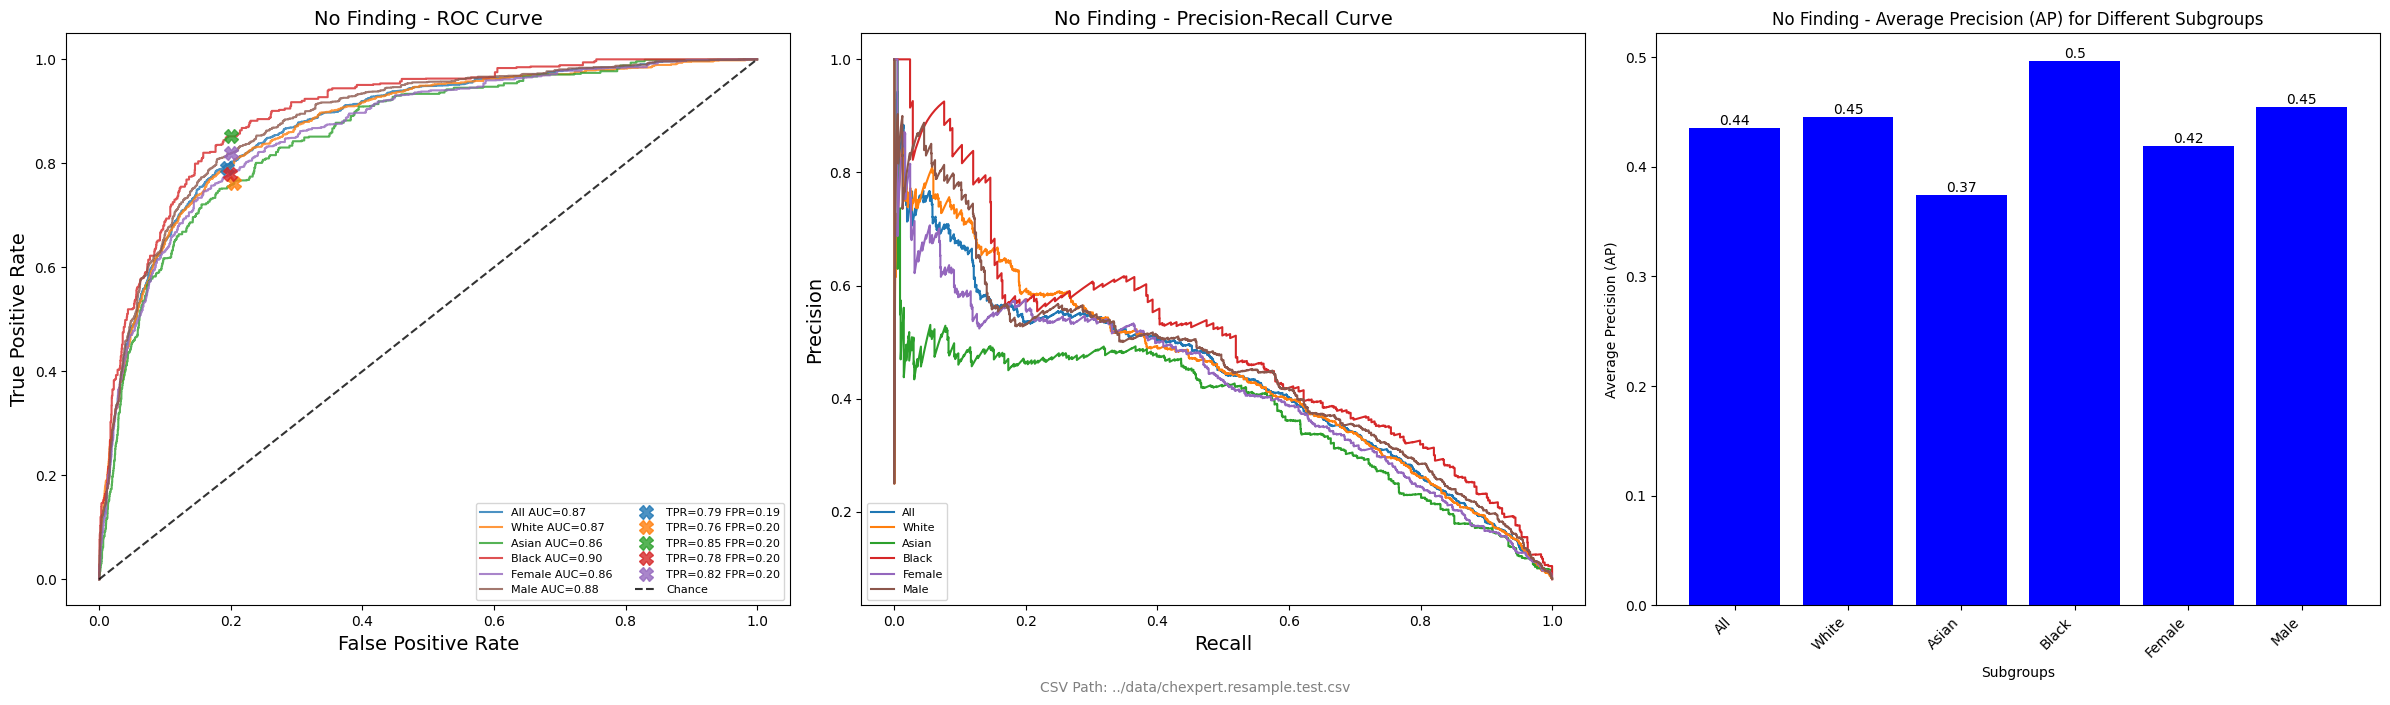

In [6]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/disease/resnet-all/', 'predictions.resample.test.csv')

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.5963
All	TPR 0.75 | FPR 0.20 | AUC 0.86
White	TPR 0.78 | FPR 0.21 | AUC 0.86
Asian	TPR 0.81 | FPR 0.22 | AUC 0.88
Black	TPR 0.67 | FPR 0.16 | AUC 0.85
Female	TPR 0.75 | FPR 0.20 | AUC 0.87
Male	TPR 0.75 | FPR 0.20 | AUC 0.86
All	AP 0.81
White	AP 0.81
Asian	AP 0.83
Black	AP 0.80
Female	AP 0.83
Male	AP 0.80


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


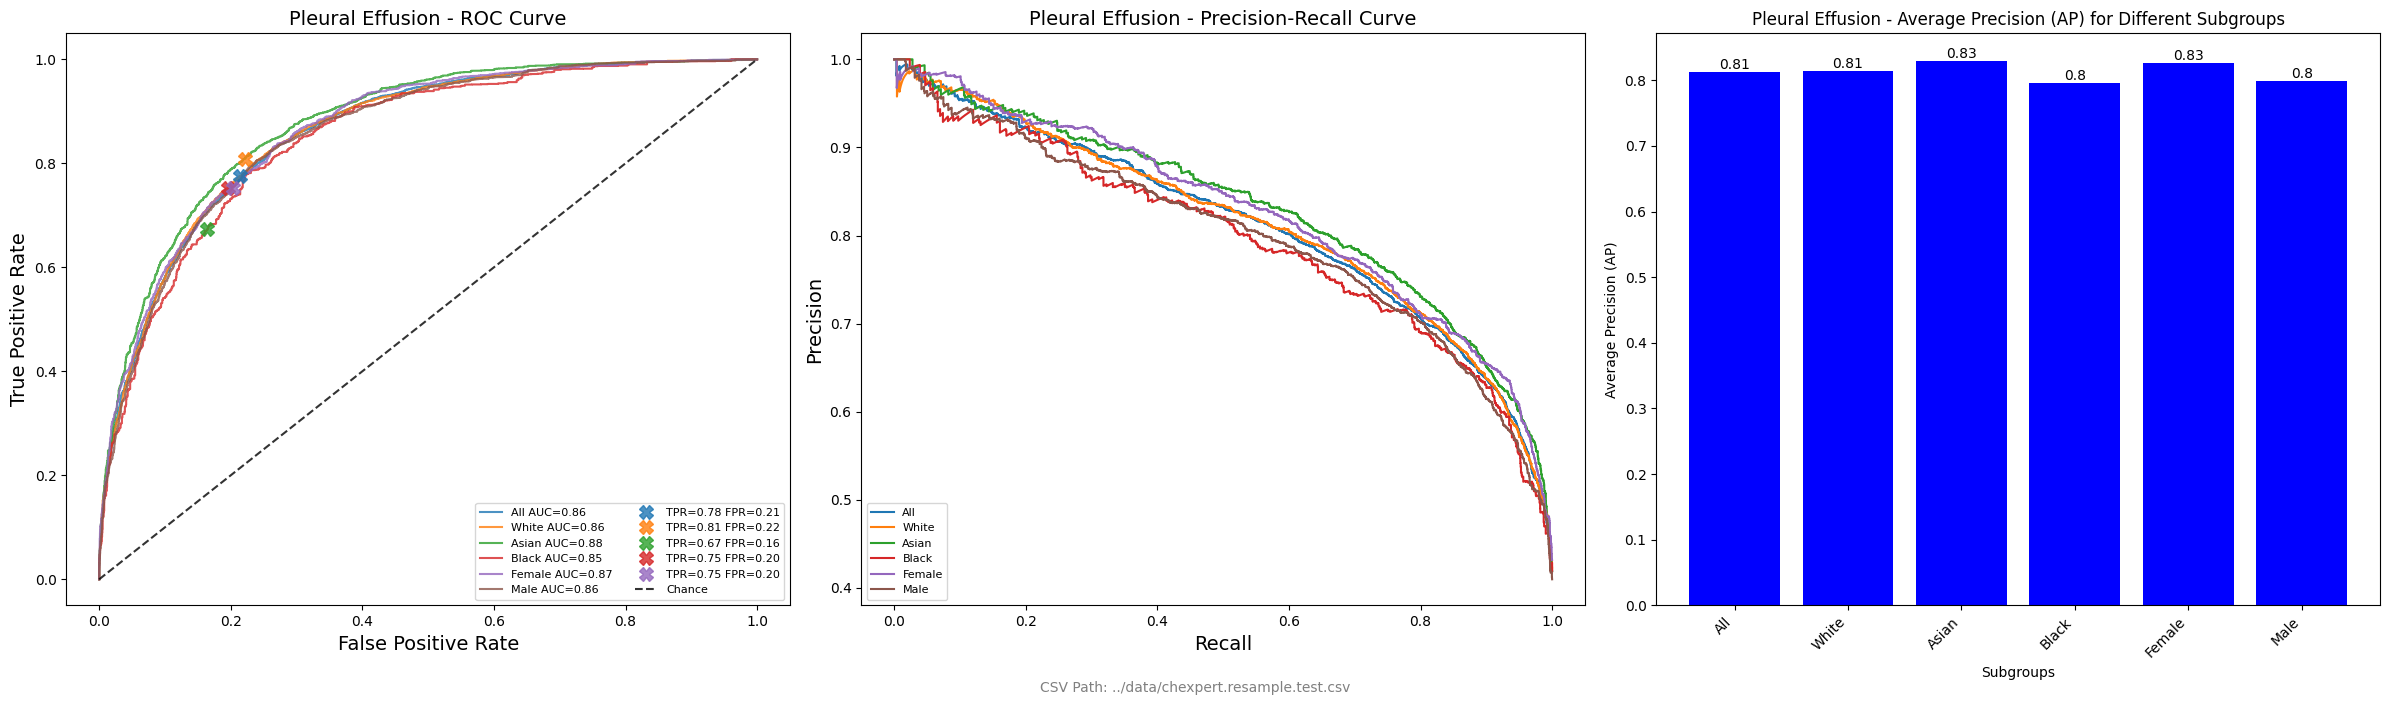

In [7]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/disease/resnet-all/', 'predictions.resample.test.csv')

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0706
All	TPR 0.53 | FPR 0.20 | AUC 0.74
White	TPR 0.59 | FPR 0.22 | AUC 0.75
Asian	TPR 0.48 | FPR 0.20 | AUC 0.72
Black	TPR 0.51 | FPR 0.18 | AUC 0.75
Female	TPR 0.40 | FPR 0.14 | AUC 0.72
Male	TPR 0.64 | FPR 0.25 | AUC 0.77
All	AP 0.22
White	AP 0.23
Asian	AP 0.19
Black	AP 0.24
Female	AP 0.20
Male	AP 0.23


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


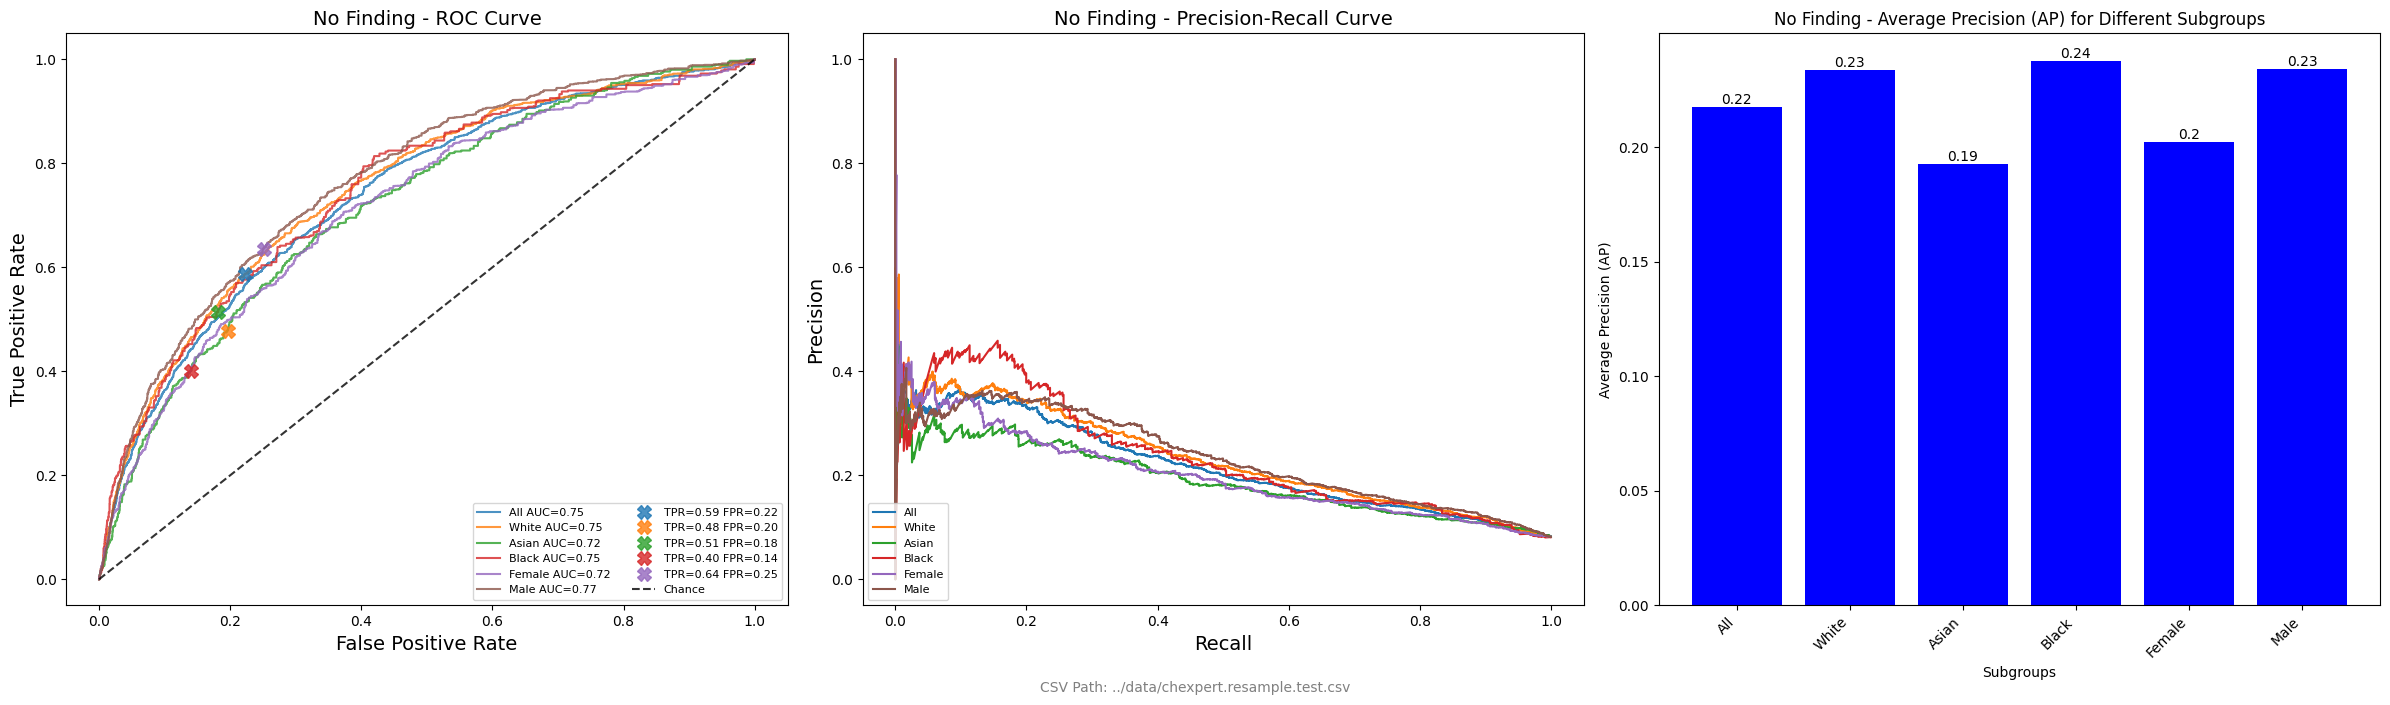

In [8]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/disease_dp/batch_128_physbatch_128_gradnorm_1.2_epsilon_50.0_delta_1.25e-05_epochs_20/resnet-all/', 'predictions.resample.test.csv')

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.4521
All	TPR 0.43 | FPR 0.20 | AUC 0.69
White	TPR 0.40 | FPR 0.18 | AUC 0.69
Asian	TPR 0.44 | FPR 0.21 | AUC 0.70
Black	TPR 0.45 | FPR 0.21 | AUC 0.69
Female	TPR 0.48 | FPR 0.24 | AUC 0.68
Male	TPR 0.39 | FPR 0.17 | AUC 0.70
All	AP 0.58
White	AP 0.57
Asian	AP 0.58
Black	AP 0.58
Female	AP 0.58
Male	AP 0.57


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


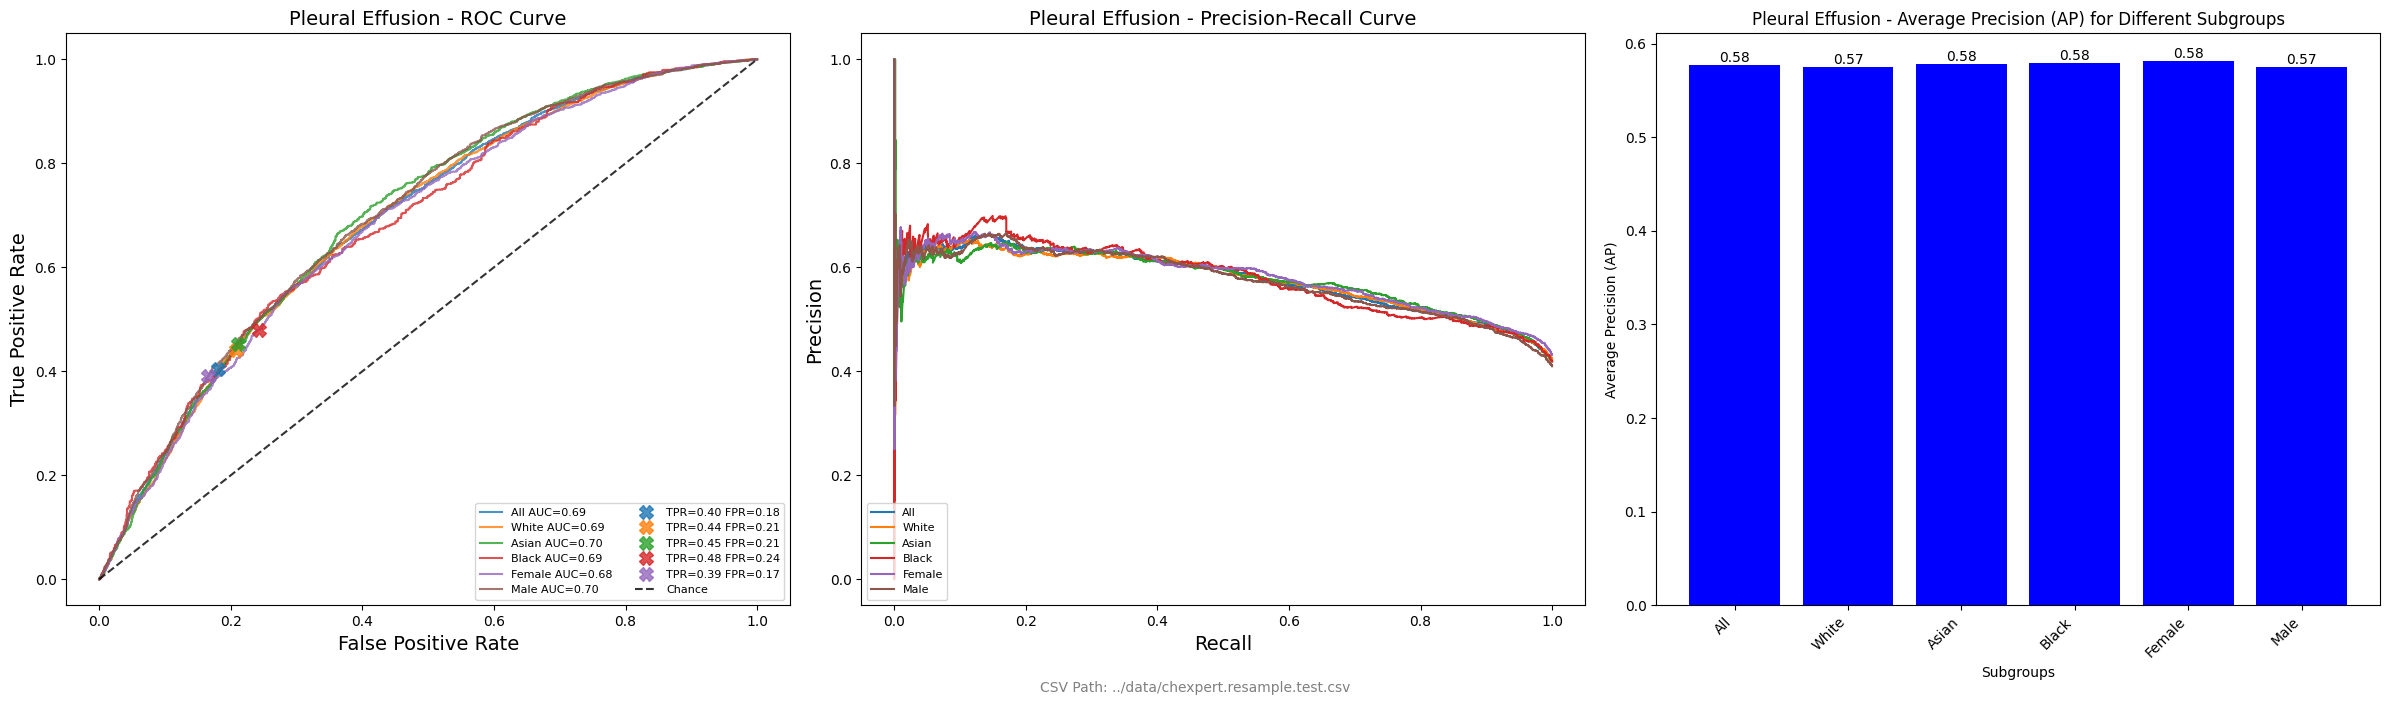

In [9]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/disease_dp/batch_128_physbatch_128_gradnorm_1.2_epsilon_50.0_delta_1.25e-05_epochs_20/resnet-all/', 'predictions.resample.test.csv')

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0730
All	TPR 0.45 | FPR 0.20 | AUC 0.69
White	TPR 0.48 | FPR 0.21 | AUC 0.71
Asian	TPR 0.46 | FPR 0.21 | AUC 0.68
Black	TPR 0.42 | FPR 0.18 | AUC 0.69
Female	TPR 0.36 | FPR 0.16 | AUC 0.67
Male	TPR 0.53 | FPR 0.23 | AUC 0.71
All	AP 0.17
White	AP 0.18
Asian	AP 0.16
Black	AP 0.17
Female	AP 0.16
Male	AP 0.18


/tmp/ipykernel_1806508/3263195138.py:243: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


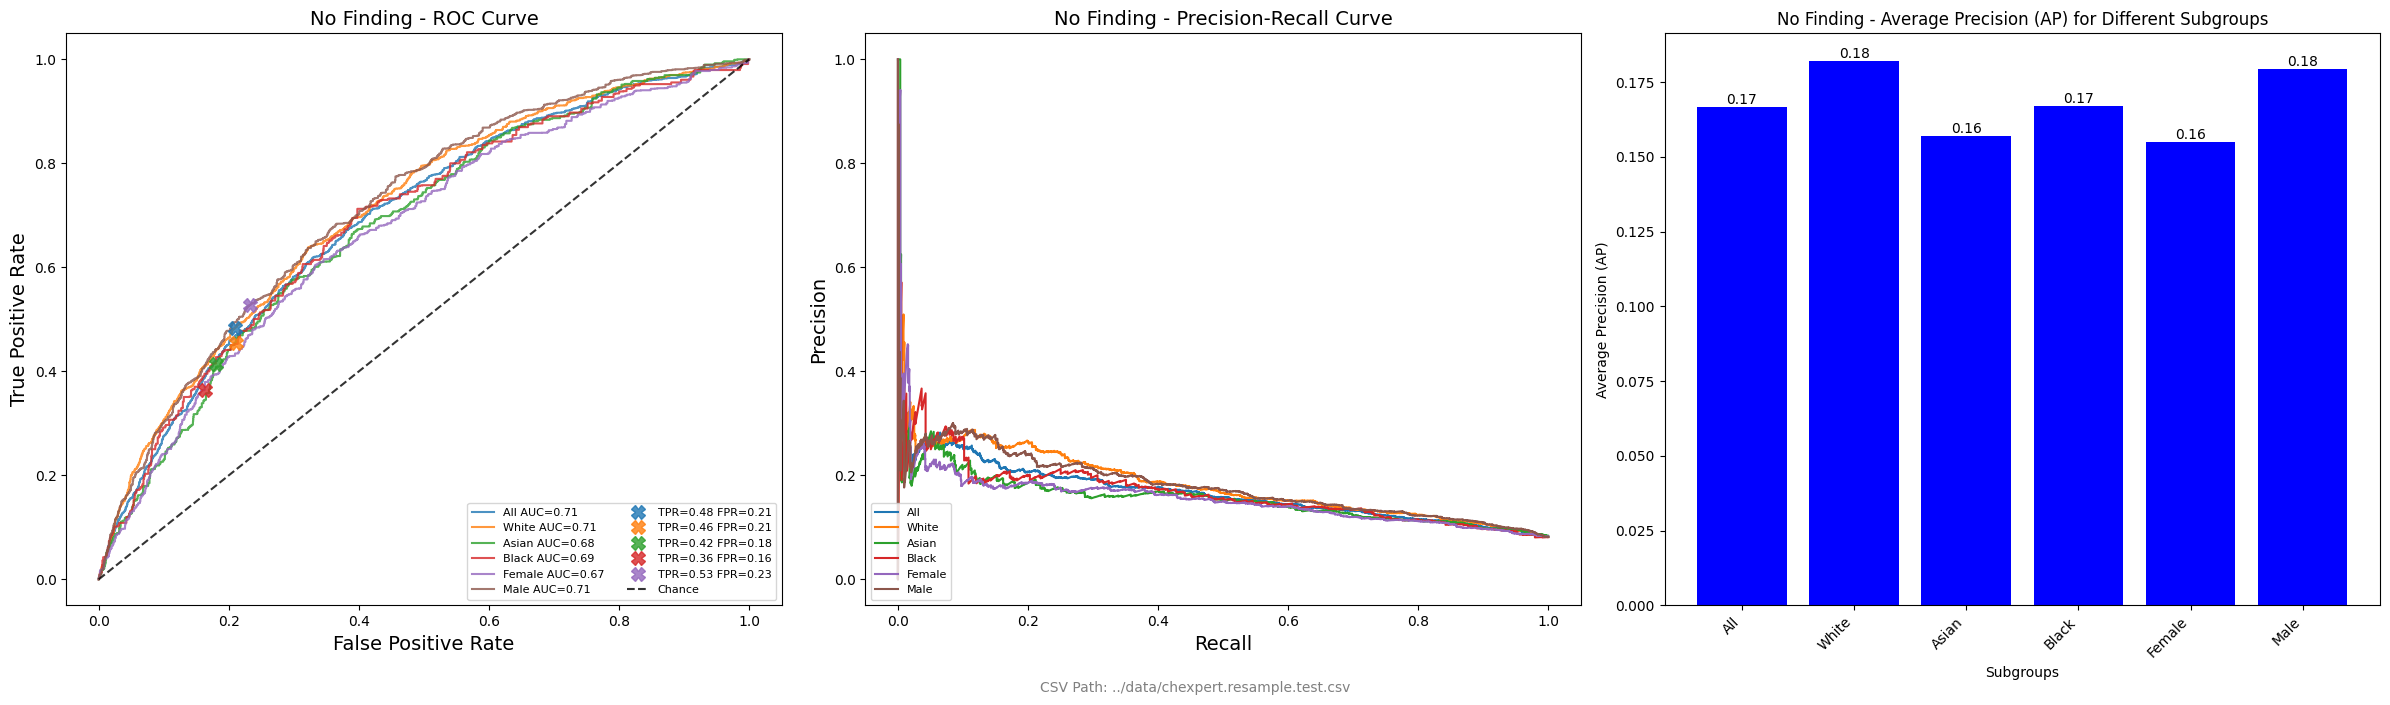

In [10]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/disease_dp/batch_256_physbatch_256_gradnorm_1.2_epsilon_50.0_delta_1.25e-05_epochs_20/resnet-all/', 'predictions.resample.test.csv')

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/disease_dp/batch_128_physbatch_128_gradnorm_1.2_epsilon_50.0_delta_1.25e-05_epochs_20/resnet-all/', 'predictions.resample.test.csv')